In [1]:
# importing the libraries
import numpy as np
import pandas as pd 

import re

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mno

import datetime

C:\Users\jagat\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Reading the data
df = pd.read_csv("C:\\Datasets\\Fifa Dataset.csv")

# lets also check the shape of the dataset
print(df.shape)

(18207, 84)


In [3]:
#Let's Check the top 5 rows

df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
#We got more than 84 columns so let's get each of their names

df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GK

In [5]:
#Let's Check for null values

empty_percentage = df.isna().mean() * 100
pd.set_option('display.max_rows', None)

print(empty_percentage)

Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Special                      0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Real Face                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
LS                          11.451639
ST                          11.451639
RS                          11.451639
LW          

In [6]:
# Function to convert weight from 'x lbs' to integer
def convert_weight(weight):
    if isinstance(weight, str):
        return int(re.findall(r'\d+', weight)[0])
    return weight

In [7]:
def convert_height(height):
    if isinstance(height, str):
        feet, inches = re.findall(r'\d+', height)
        return int(feet) * 12 + int(inches)  # Convert height to inches
    return height

In [8]:
# Fill missing values for specific columns
df['ShortPassing'] = df['ShortPassing'].fillna(df['ShortPassing'].mean())
df['Volleys'] = df['Volleys'].fillna(df['Volleys'].mean())
df['Dribbling'] = df['Dribbling'].fillna(df['Dribbling'].mean())
df['Curve'] = df['Curve'].fillna(df['Curve'].mean())
df['FKAccuracy'] = df['FKAccuracy'].fillna(df['FKAccuracy'].mean())  # Fixed
df['LongPassing'] = df['LongPassing'].fillna(df['LongPassing'].mean())
df['BallControl'] = df['BallControl'].fillna(df['BallControl'].mean())
df['HeadingAccuracy'] = df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean())
df['Finishing'] = df['Finishing'].fillna(df['Finishing'].mean())
df['Crossing'] = df['Crossing'].fillna(df['Crossing'].mean())

# Convert 'Weight' and 'Height' from strings to integers
df['Weight'] = df['Weight'].apply(convert_weight)
df['Height'] = df['Height'].apply(convert_height)

# Fill missing values for 'Weight' and 'Height' using the mean
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())

# Fill missing values for categorical and other numeric columns
df['Body Type'] = df['Body Type'].fillna('Normal')
df['Position'] = df['Position'].fillna('ST')
df['Club'] = df['Club'].fillna('No Club')
df['Work Rate'] = df['Work Rate'].fillna('Medium/ Medium')
df['Skill Moves'] = df['Skill Moves'].fillna(df['Skill Moves'].median())
df['Weak Foot'] = df['Weak Foot'].fillna(3)
df['Preferred Foot'] = df['Preferred Foot'].fillna(df['Preferred Foot'].mode()[0])  # Using mode
df['International Reputation'] = df['International Reputation'].fillna(1)

# Fill missing 'Wage' column with mean and convert to integer
df['Wage'] = df['Wage'].str.replace('€', '').str.replace('K', '000').astype(float)
df['Wage'] = df['Wage'].fillna(int(df['Wage'].mean()))


# Drop unnecessary columns: 'Jersey Number', 'Loaned From', and 'Joined'
df.drop(['Jersey Number', 'Loaned From', 'Joined', 'Contract Valid Until'], axis=1, inplace=True)

In [9]:
#Let's Check if still have something missing

df.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                     48
Position                       0
Height                         0
Weight                         0
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM        

In [10]:
# Majority of the misssing values are in the positions of the players ex RB = Right Back
# st = Striker
# We will need such positions to analyse the players and, we can't just fill this data as it's string so let's focus on other columns
# at the moment.

# Modify functions to work on a row of the DataFrame

def defending(row):
    return int(round(row[['Marking', 'StandingTackle', 'SlidingTackle']].mean(skipna=True))) if row[['Marking', 'StandingTackle', 'SlidingTackle']].notna().any() else 0

def general(row):
    return int(round(row[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean(skipna=True))) if row[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].notna().any() else 0

def mental(row):
    return int(round(row[['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean(skipna=True))) if row[['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].notna().any() else 0

def passing(row):
    return int(round(row[['Crossing', 'ShortPassing', 'LongPassing']].mean(skipna=True))) if row[['Crossing', 'ShortPassing', 'LongPassing']].notna().any() else 0

def mobility(row):
    return int(round(row[['Acceleration', 'SprintSpeed', 'Agility', 'Reactions']].mean(skipna=True))) if row[['Acceleration', 'SprintSpeed', 'Agility', 'Reactions']].notna().any() else 0

def power(row):
    return int(round(row[['Balance', 'Jumping', 'Stamina', 'Strength']].mean(skipna=True))) if row[['Balance', 'Jumping', 'Stamina', 'Strength']].notna().any() else 0

def rating(row):
    return int(round(row[['Potential', 'Overall']].mean(skipna=True))) if row[['Potential', 'Overall']].notna().any() else 0

def shooting(row):
    return int(round(row[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower', 'LongShots', 'Penalties']].mean(skipna=True))) if row[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower', 'LongShots', 'Penalties']].notna().any() else 0

# Apply the functions row by row
df['Defending'] = df.apply(defending, axis=1)
df['General'] = df.apply(general, axis=1)
df['Mental'] = df.apply(mental, axis=1)
df['Passing'] = df.apply(passing, axis=1)
df['Mobility'] = df.apply(mobility, axis=1)
df['Power'] = df.apply(power, axis=1)
df['Rating'] = df.apply(rating, axis=1)
df['Shooting'] = df.apply(shooting, axis=1)

# Drop the original columns after creating new features
columns_to_drop = ['Marking', 'StandingTackle', 'SlidingTackle', 'HeadingAccuracy', 'Dribbling', 
                   'Curve', 'BallControl', 'Aggression', 'Interceptions', 'Positioning', 
                   'Vision', 'Composure', 'Crossing', 'ShortPassing', 'LongPassing', 
                   'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 
                   'Jumping', 'Stamina', 'Strength', 'Potential', 'Overall', 'Finishing', 
                   'Volleys', 'FKAccuracy', 'ShotPower', 'LongShots', 'Penalties']
df.drop(columns=columns_to_drop, inplace=True)


In [11]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Club', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Defending', 'General', 'Mental', 'Passing',
       'Mobility', 'Power', 'Rating', 'Shooting'],
      dtype='object')

In [12]:
# We don't have any use of real face either

df.drop(['Real Face'], axis=1, inplace=True)

In [13]:
pd.set_option('display.max_columns', None)
df.head()

,Name,Age,Nationality,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,L. Messi,31,Argentina,FC Barcelona,€110.5M,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,67.0,159.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,6.0,11.0,15.0,14.0,8.0,€226.5M,29,89,71,87,91,74,94,88
1,Cristiano Ronaldo,33,Portugal,Juventus,€77M,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,74.0,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,7.0,11.0,15.0,14.0,11.0,€127.1M,27,88,73,81,91,83,94,88
2,Neymar Jr,26,Brazil,Paris Saint-Germain,€118.5M,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,69.0,150.0,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,9.0,9.0,15.0,15.0,11.0,€228.1M,28,85,72,80,94,69,92,84
3,De Gea,27,Spain,Manchester United,€72M,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,76.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,88.0,94.0,€138.6M,16,26,43,39,66,54,92,21
4,K. De Bruyne,27,Belgium,Manchester City,€102M,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,71.0,154.0,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,15.0,13.0,5.0,10.0,13.0,€196.4M,59,79,81,92,81,76,92,85


In [19]:
# Now it look much cleaner and easier to interpret so let's focus our attention on positions.
# The values you're seeing, such as "88+2," represent the overall rating of a player in a specific position. 
# The format typically means:

# "88" is the base rating.
# "+2" represents a boost or potential improvement, such as a chemistry boost, fitness, or special in-game enhancements that increase the player's performance by 2 points.

# So for now we will simplify the rating into categories 75-80 = D
# 80 - 85 = C
# 85 - 90 = B
# 90 - 95 = A
# 95 - 100 = O
# else F and let's take that eventually player will progress as best case scenario so we will increase the rating by half
# of it's potential and then fill up the missing values with the mean and then assigning them their categories for each
#position, replacing the integer with category.

In [14]:
position_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
                    'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB',
                    'LB', 'LCB', 'CB', 'RCB', 'RB']

# Function to handle ratings like "88+2" and ignore non-numeric entries
def process_rating(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        if '+' in value:  # Handle strings like "88+2"
            base, potential = map(int, value.split('+'))
            final_rating = base + (potential / 2)  # Increase by half the potential
            return final_rating
        elif value.isdigit():  # Handle numeric strings
            return float(value)
    # If it's not a numeric string, return it as is (e.g., letters like 'B')
    return value

# Apply the processing function to all position columns
for col in position_columns:
    df[col] = df[col].apply(process_rating)

# Calculate the mean for each position column and fill missing values
for col in position_columns:
    column_mean = df[col][df[col].apply(lambda x: isinstance(x, (int, float)))].mean()
    df[col] = df[col].fillna(column_mean)

# Function to assign categories based on the rating
def assign_category(rating):
    if isinstance(rating, (int, float)):  # Only assign category if it's a number
        if rating >= 95:
            return 'O'
        elif rating >= 90:
            return 'A'
        elif rating >= 85:
            return 'B'
        elif rating >= 80:
            return 'C'
        elif rating >= 75:
            return 'D'
        else:
            return 'F'  # For ratings below 75
    return rating  # Return the original value if it's not a numeric rating

# Apply the category assignment to all position columns
for col in position_columns:
    df[col] = df[col].apply(assign_category)

# The df now has the positions replaced with categories where appropriate

In [15]:
df.head()

,Name,Age,Nationality,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,L. Messi,31,Argentina,FC Barcelona,€110.5M,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,67.0,159.0,B,B,B,A,A,A,A,A,A,A,A,A,B,B,B,A,F,F,F,F,F,F,F,F,F,F,6.0,11.0,15.0,14.0,8.0,€226.5M,29,89,71,87,91,74,94,88
1,Cristiano Ronaldo,33,Portugal,Juventus,€77M,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,74.0,183.0,A,A,A,A,A,A,A,A,B,B,B,B,C,C,C,B,F,F,F,F,F,F,F,F,F,F,7.0,11.0,15.0,14.0,11.0,€127.1M,27,88,73,81,91,83,94,88
2,Neymar Jr,26,Brazil,Paris Saint-Germain,€118.5M,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,69.0,150.0,B,B,B,A,A,A,A,A,A,A,A,B,C,C,C,B,F,F,F,F,F,F,F,F,F,F,9.0,9.0,15.0,15.0,11.0,€228.1M,28,85,72,80,94,69,92,84
3,De Gea,27,Spain,Manchester United,€72M,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,76.0,168.0,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,90.0,85.0,87.0,88.0,94.0,€138.6M,16,26,43,39,66,54,92,21
4,K. De Bruyne,27,Belgium,Manchester City,€102M,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,71.0,154.0,C,C,C,B,B,B,B,B,B,B,B,B,B,B,B,B,D,D,D,D,D,F,F,F,F,F,15.0,13.0,5.0,10.0,13.0,€196.4M,59,79,81,92,81,76,92,85


5 Youngest Players:
                 Name  Age Nationality
11457     W. Geubbels   16      France
11732        A. Taoui   16      France
12496  Pelayo Morilla   16       Spain
12828        Guerrero   16       Spain
13293     H. Massengo   16      France
5 Highest Paid Players:
                Name      Wage Nationality
0           L. Messi  565000.0   Argentina
7          L. Suárez  455000.0     Uruguay
6          L. Modrić  420000.0     Croatia
1  Cristiano Ronaldo  405000.0    Portugal
8       Sergio Ramos  380000.0       Spain


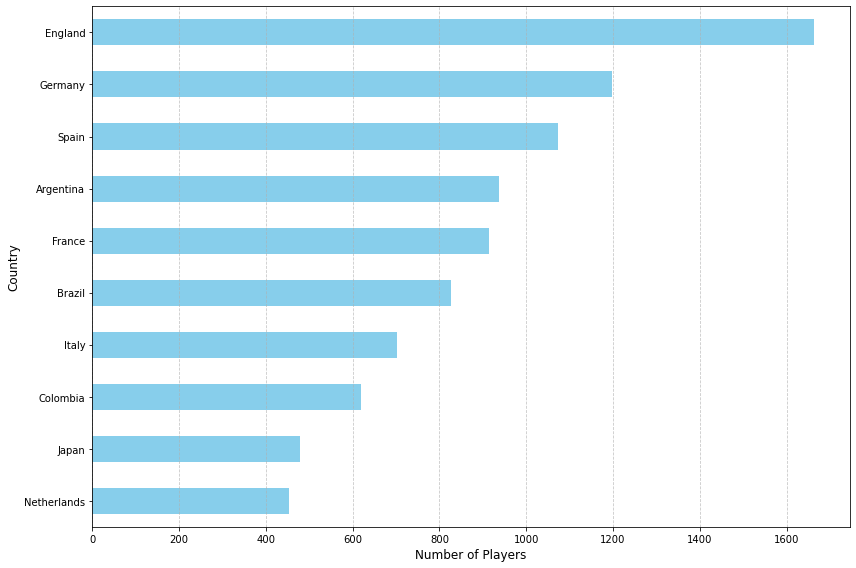

In [17]:
# Data is now almost ready however let's get some basic visualisations to understand also we missed that the Value which is
# Supposed to be Networth is a string so we shall make it integer.

# For Start let's get the 5 most youngest, 5 highest paid, and proportion of number of players from top 10 countries 
# in our dataset

#5 youngest players
youngest_players = df.nsmallest(5, 'Age')
print("5 Youngest Players:")
print(youngest_players[['Name', 'Age', 'Nationality']])

#5 highest-paid players
highest_paid_players = df.nlargest(5, 'Wage')
print("5 Highest Paid Players:")
print(highest_paid_players[['Name', 'Wage', 'Nationality']])

# Count of the number of players from each country
country_player_count = df['Nationality'].value_counts()

# Plot the number of players per country in a horizontal bar chart
plt.figure(figsize=(12, 8))
country_player_count.sort_values(ascending=True).tail(10).plot(kind='barh', color='skyblue') 
plt.xlabel('Number of Players', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
# Interesting despite being the most world cup winner Brazil is not even among top 5 and 3/5 of the youngest Players are from
# France so looks like France's youth is taking more interest in this Sport, plus who knew Ronaldo wasn't even in top 3 when it
# Came to salary, so let's just fix our Value Column and then move towards dashboard building, where we can find
# More such features.

def convert_value_to_numeric(value):
    """
    This function converts a string value with K (thousands) and M (millions)
    into a float representing the value in euros.
    """
    value = value.replace('€', '')  # Remove the Euro symbol
    
    if 'M' in value:
        # Convert millions (e.g., 110.5M -> 110500000)
        return float(re.sub(r'[^\d.]', '', value)) * 1e6
    elif 'K' in value:
        # Convert thousands (e.g., 20K -> 20000)
        return float(re.sub(r'[^\d.]', '', value)) * 1e3
    else:
        # No suffix (e.g., just a number)
        return float(re.sub(r'[^\d.]', '', value))

# Let's take 'Value' column and create new column 'Net Worth'
df['Net Worth'] = df['Value'].apply(convert_value_to_numeric)

# Drop the old 'Value' column
df.drop('Value', axis=1, inplace=True)

In [19]:
df.head()

,Name,Age,Nationality,Club,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Net Worth
0,L. Messi,31,Argentina,FC Barcelona,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,67.0,159.0,B,B,B,A,A,A,A,A,A,A,A,A,B,B,B,A,F,F,F,F,F,F,F,F,F,F,6.0,11.0,15.0,14.0,8.0,€226.5M,29,89,71,87,91,74,94,88,110500000.0
1,Cristiano Ronaldo,33,Portugal,Juventus,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,74.0,183.0,A,A,A,A,A,A,A,A,B,B,B,B,C,C,C,B,F,F,F,F,F,F,F,F,F,F,7.0,11.0,15.0,14.0,11.0,€127.1M,27,88,73,81,91,83,94,88,77000000.0
2,Neymar Jr,26,Brazil,Paris Saint-Germain,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,69.0,150.0,B,B,B,A,A,A,A,A,A,A,A,B,C,C,C,B,F,F,F,F,F,F,F,F,F,F,9.0,9.0,15.0,15.0,11.0,€228.1M,28,85,72,80,94,69,92,84,118500000.0
3,De Gea,27,Spain,Manchester United,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,76.0,168.0,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,90.0,85.0,87.0,88.0,94.0,€138.6M,16,26,43,39,66,54,92,21,72000000.0
4,K. De Bruyne,27,Belgium,Manchester City,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,71.0,154.0,C,C,C,B,B,B,B,B,B,B,B,B,B,B,B,B,D,D,D,D,D,F,F,F,F,F,15.0,13.0,5.0,10.0,13.0,€196.4M,59,79,81,92,81,76,92,85,102000000.0


In [20]:
df.to_excel('C:\\Datasets\\Fifa_Dataset_Modified.xlsx', index=False)

C:\Users\jagat\AppData\Local\Temp\ipykernel_22044\2693287315.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel('C:\\Datasets\\Fifa_Dataset_Modified.xlsx', index=False)


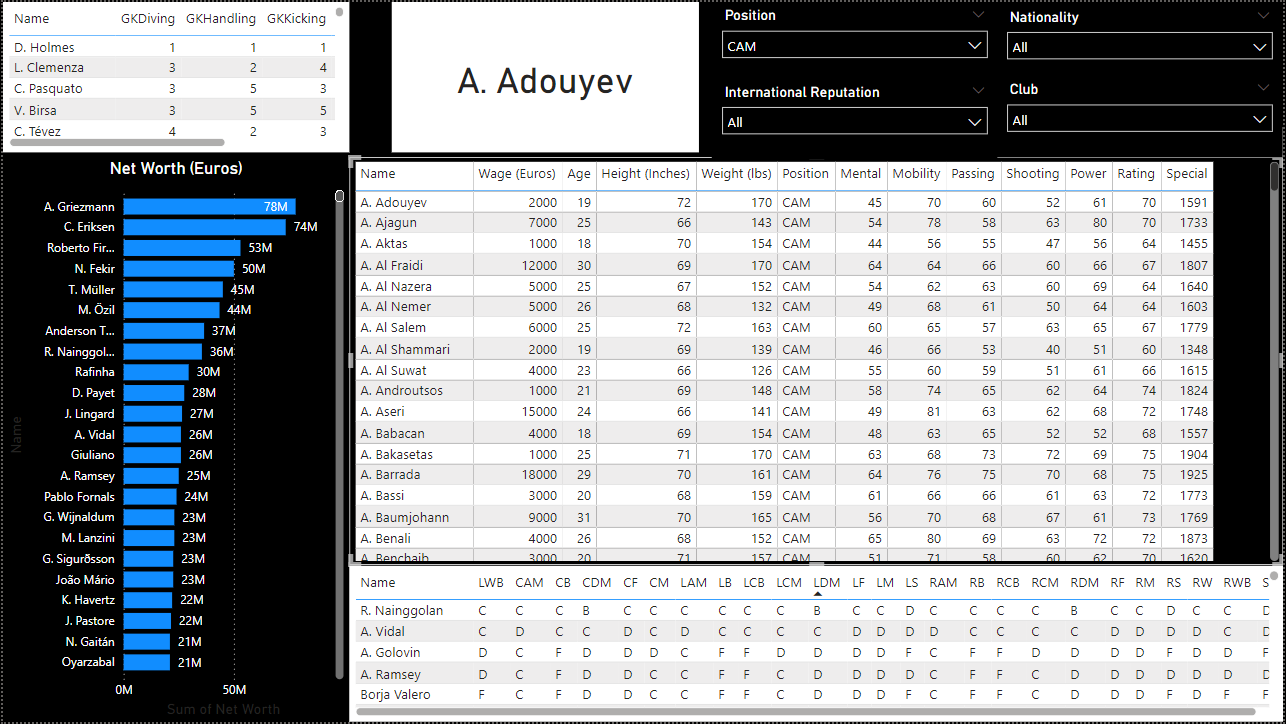